<a href="https://colab.research.google.com/github/chigbuce/-ML-/blob/master/UsedCarProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used Car Sales Prediction

In [6]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#reading the dataset
df = pd.read_csv('/content/sample_data/used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [8]:
df.shape

(4009, 12)

### Data cleaning and EDA

In [9]:
#Columns and Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [10]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [11]:
#rearranging
df.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,4009.0,2015.51559,6.104816,1974.0,2012.0,2017.0,2020.0,2024.0


In [12]:
#a Let's find out how many null values we have in the data
df.isna().sum().sort_values(ascending = False)

,0
clean_title,596
fuel_type,170
accident,113
brand,0
milage,0
model_year,0
model,0
engine,0
ext_col,0
transmission,0


In [14]:
# Filling the missing values of the 'fuel_type' column with their mode
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

In [16]:
# Filling the missing values of the 'accident' columns with their mode
df['accident'].fillna(df['accident'].mode()[0], inplace=True)

In [18]:
# Filling the missing values of the 'accident' columns with their mode
df['clean_title'].fillna(df['clean_title'].mode()[0], inplace=True)

In [19]:
#Let's find out how many null values we have in the data
df.isna().sum().sort_values(ascending = False)

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [20]:
df.shape

(4009, 12)

In [21]:
#Get list of categorical variables in the data
s = (df.dtypes=='object')
object_cols = list(s[s].index)
object_cols

['brand',
 'model',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'price']

In [22]:
df['clean_title'].unique()

array(['Yes'], dtype=object)

In [23]:
df.drop(['clean_title'],axis=1,inplace=True)
df.drop(['accident'],axis=1,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     4009 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   price         4009 non-null   object
dtypes: int64(1), object(9)
memory usage: 313.3+ KB


In [26]:
label_car = df.copy()

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in label_car:
    label_car[col] = le.fit_transform(label_car[col])
label_car.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,price
0,14,1743,22,1883,1,581,16,29,14,7
1,19,1182,30,1464,2,566,32,185,71,820
2,27,1325,31,1043,2,541,40,38,14,1164
3,20,1242,24,2617,3,724,23,29,14,208
4,3,1225,30,2662,2,200,32,120,14,748


In [28]:
label_car.corr()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,price
brand,1.000000,-0.070170,0.001568,-0.004905,0.033300,-0.066116,-0.005099,-0.002001,0.008545,0.017063
model,-0.070170,1.000000,0.027566,-0.015124,0.004079,-0.037443,-0.024244,-0.008342,0.040801,0.045096
model_year,0.001568,0.027566,1.000000,0.020165,-0.071828,0.149876,0.066123,-0.036817,0.037121,0.206002
milage,-0.004905,-0.015124,0.020165,1.000000,-0.004117,0.044924,0.005365,0.015085,-0.004460,-0.090419
fuel_type,0.033300,0.004079,-0.071828,-0.004117,1.000000,0.080890,0.094140,-0.010056,0.013986,0.026793
engine,-0.066116,-0.037443,0.149876,0.044924,0.080890,1.000000,-0.011988,-0.037665,0.023628,0.223691
transmission,-0.005099,-0.024244,0.066123,0.005365,0.094140,-0.011988,1.000000,0.001548,-0.030224,-0.039311
ext_col,-0.002001,-0.008342,-0.036817,0.015085,-0.010056,-0.037665,0.001548,1.000000,0.085077,-0.035523
int_col,0.008545,0.040801,0.037121,-0.004460,0.013986,0.023628,-0.030224,0.085077,1.000000,0.039930
price,0.017063,0.045096,0.206002,-0.090419,0.026793,0.223691,-0.039311,-0.035523,0.039930,1.000000


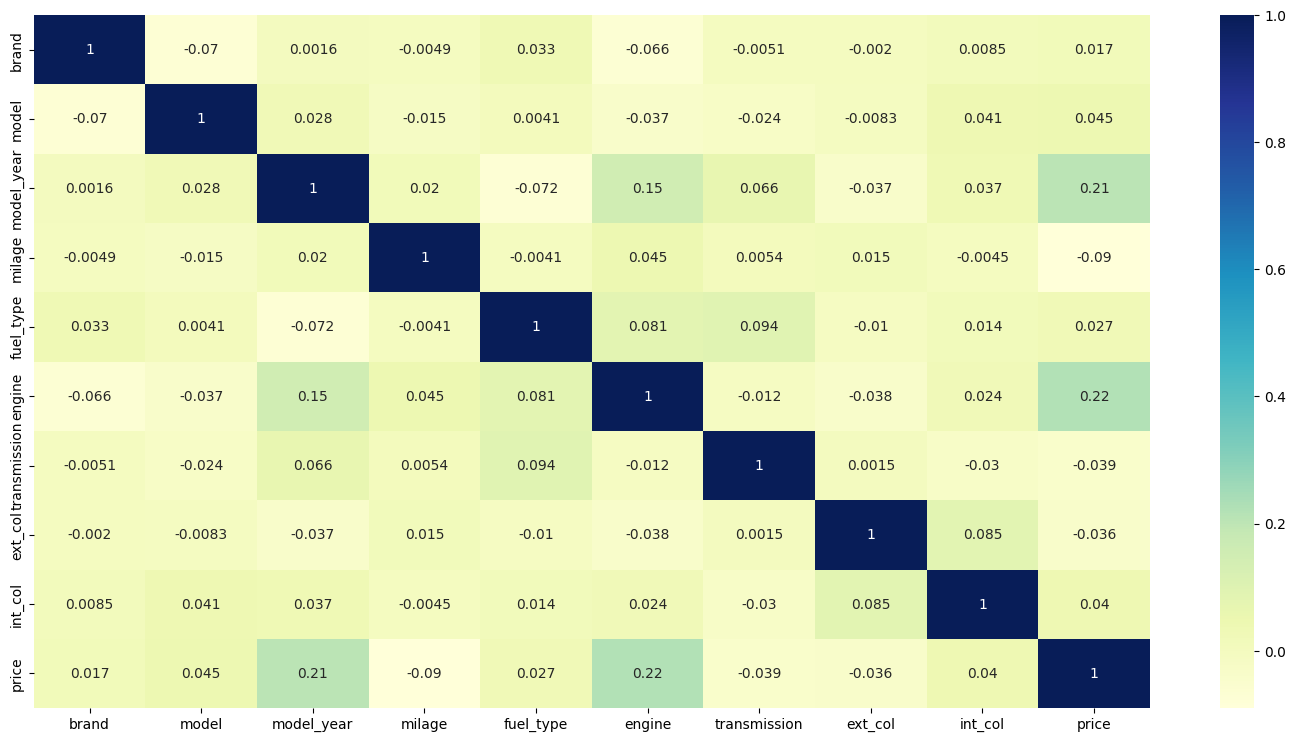

In [29]:
plt.figure(figsize=(18, 9))
sns.heatmap(label_car.corr(), annot=True, cmap='YlGnBu')
plt.show()

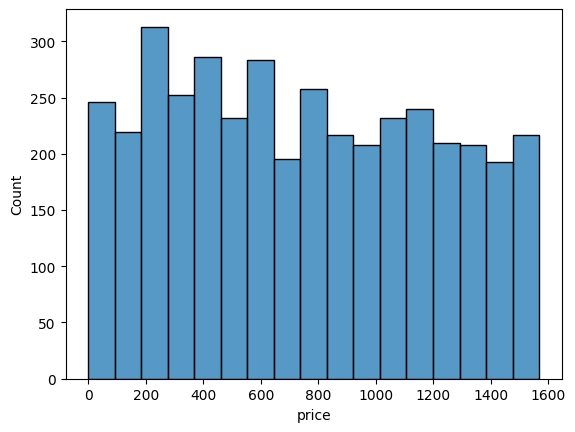

In [30]:
#to see the distribution of the price in the data
sns.histplot(data=label_car, x='price')

plt.show()

In [31]:
#what is the relationship between the numerical column and a categorical column in our data

grouping = label_car.groupby('brand')
grouping['price'].agg(['min', 'max', 'mean'])

,min,max,mean
brand,,,
0,2,1526,658.234375
1,358,1406,764.263158
2,224,1452,707.111111
3,11,1542,738.580000
4,11,1567,779.861333
5,28,1560,637.666667
6,1,1,1.000000
7,47,1234,511.866667
8,2,1558,685.149533


In [32]:
#what is the relationship between the categorical columns in our data

pd.crosstab(label_car['engine'], label_car['fuel_type'], normalize = 'index')

fuel_type,0,1,2,3,4,5,6
engine,,,,,,,
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1141,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1142,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1143,0.0,0.0,1.0,0.0,0.0,0.0,0.0


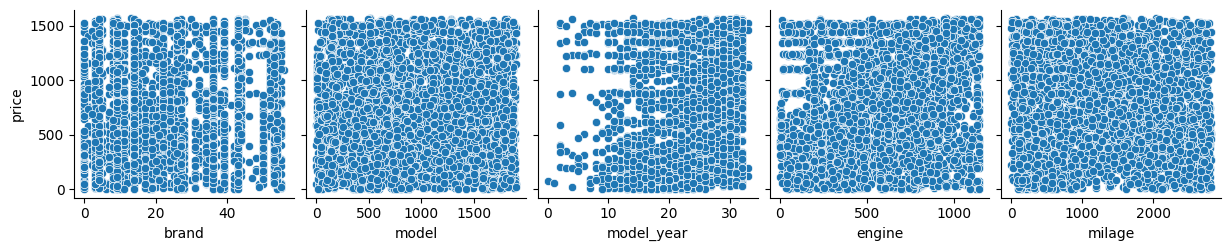

In [33]:
#scatter plot between Price and some input features
sns.pairplot(data=label_car,
            x_vars=['brand', 'model', 'model_year', 'engine', 'milage'],
            y_vars='price')

In [35]:
#feature scaling
from sklearn import preprocessing
n_test = label_car[['engine','milage',
                'model', 'ext_col','int_col','model_year','transmission','brand','fuel_type']]
cols_to_norm = ['engine','milage',
                'model', 'ext_col','int_col','model_year','transmission','brand','fuel_type']
x = n_test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
n_test = pd.DataFrame(x_scaled, columns=cols_to_norm)
l_test = label_car.drop(['engine','milage',
                'model', 'ext_col','int_col','model_year','transmission','brand','fuel_type'], axis=1)
label_car = pd.concat([n_test, l_test], axis=1)
label_car.columns

Index(['engine', 'milage', 'model', 'ext_col', 'int_col', 'model_year',
       'transmission', 'brand', 'fuel_type', 'price'],
      dtype='object')

## Data preparation

In [36]:
#train_test_split

from sklearn.model_selection import train_test_split

#splitting the data into train and test data
label_car_train, label_car_test = train_test_split(label_car, train_size=0.8, random_state=42)
print(label_car_train.shape)
print(label_car_test.shape)

(3207, 10)
(802, 10)


## Training using statsmodel

In [37]:
y_train = label_car_train.pop('price')
X_train = label_car_train

In [ ]:
X_train.head(30)

,engine,milage,model,ext_col,int_col,model_year,transmission,brand,fuel_type,accident
2473,0.478603,0.833156,0.340011,0.402516,0.387097,0.818182,0.278689,0.250000,0.333333,0.0
1338,0.638428,0.946752,0.986294,0.091195,0.090323,0.969697,0.032787,0.267857,0.333333,1.0
1613,0.772052,0.696841,0.511334,0.119497,0.980645,0.757576,0.327869,0.071429,0.333333,1.0
1610,0.537991,0.857295,0.467053,0.955975,0.090323,0.787879,0.262295,0.482143,0.333333,1.0
2600,0.079476,0.511537,0.377965,0.402516,0.090323,0.818182,0.622951,0.250000,0.166667,0.0
3945,0.129258,0.973731,0.272536,0.119497,0.090323,0.757576,0.262295,0.553571,0.333333,1.0
423,0.744105,0.648562,0.428044,0.955975,0.761290,0.787879,0.967213,0.571429,0.333333,1.0
3737,0.725764,0.658502,0.352135,0.402516,0.090323,0.969697,0.032787,0.250000,0.333333,1.0
1096,0.479476,0.419950,0.867686,0.691824,0.367742,0.848485,0.590164,0.000000,0.333333,0.0
506,0.458515,0.269436,0.121244,1.000000,1.000000,0.909091,0.590164,0.642857,0.333333,1.0


In [38]:
## using statsmodel
import statsmodels.api as sm

#adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fit the regression line using 'OLS'
LR = sm.OLS(y_train, X_train_sm).fit()

LR.params

,0
const,262.524431
engine,354.553057
milage,-160.946977
model,69.647727
ext_col,-16.712902
int_col,38.076662
model_year,480.484651
transmission,-100.449898
brand,38.134126
fuel_type,63.638499


In [39]:
#to return the complete summary for the linear regression model
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     42.82
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           5.75e-73
Time:                        16:00:24   Log-Likelihood:                -23967.
No. Observations:                3207   AIC:                         4.795e+04
Df Residuals:                    3197   BIC:                         4.802e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          262.5244     49.404      5.314      0.000     165.658     359.391
engine         354.5531     29.121     12.175      0.000     297.456     411.650
milage        -160.9470     25.821     -6.233      0.000    -211.574    -110.320
model           69.6477     26.091      2.669      0.008      18.490     120.805
ext_col        -16.7129     21.416     -0.780      0.435     -58.703      25.277
int_col         38.0767     26.681      1.427      0.154     -14.237      90.391
model_year     480.4847     42.274     11.366      0.000     397.597     563.372
transmission  -100.4499     30.972     -3.243      0.001    -161.177     -39.723
brand           38.1341     26.118      1.460      0.144     -13.076      89.344
fuel_type       63.6385     70.500      0.903      0.367     -74.592     201.869
==============================================================================
Omnibus:                      119.474   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.564
Skew:                           0.239   Prob(JB):                     6.44e-17
Kurtosis:                       2.427   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Understanding the above summary statistics

Like in simple linear regression we are interested in:
- The co-effiecients and their p_values
- R_square value
- p_value of F-statistics

- If the p-value of coefficeient of any feature is <0.05, it means the feature is statistically significant

This means that the INDUS, AGE and ZN columns can be removed

- R2 value = 0.751

That is, 75.1% of the variance in Price is explained by all the features

- Observe that the f-statistic has very low p-value

This means that the complete model is statistically siignificant.

### Making the prediction

In [40]:
y_test = label_car_test.pop('price')
X_test = label_car_test

X_test.head()

,engine,milage,model,ext_col,int_col,model_year,transmission,brand,fuel_type
2580,0.337991,0.667732,0.466526,0.955975,0.458065,0.818182,0.622951,0.482143,0.333333
3660,0.125764,0.762868,0.469689,0.069182,0.064516,0.393939,0.622951,0.160714,0.333333
897,0.629694,0.915513,0.015287,0.402516,0.458065,0.787879,0.262295,0.785714,0.000000
2091,0.777293,0.407881,0.785978,0.827044,0.761290,0.666667,0.967213,0.642857,0.333333
1044,0.879476,0.285410,0.807591,0.119497,0.090323,0.818182,0.868852,0.250000,0.333333


In [41]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(802, 10)

In [42]:
y_test_pred = LR.predict(X_test_sm)

### Evaluation

In [43]:
from sklearn import metrics
print('MAE = ', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE = ', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R_square = ', metrics.r2_score(y_test, y_test_pred))

MAE =  351.49727748382077
MSE =  183125.48244214442
RMSE =  427.9316329066413
R_square =  0.05493976057378902


# 2. Build a MLR model using sklearn

In [44]:
X_train.head(30)

,engine,milage,model,ext_col,int_col,model_year,transmission,brand,fuel_type
2473,0.478603,0.833156,0.340011,0.402516,0.387097,0.818182,0.278689,0.250000,0.333333
1338,0.638428,0.946752,0.986294,0.091195,0.090323,0.969697,0.032787,0.267857,0.333333
1613,0.772052,0.696841,0.511334,0.119497,0.980645,0.757576,0.327869,0.071429,0.333333
1610,0.537991,0.857295,0.467053,0.955975,0.090323,0.787879,0.262295,0.482143,0.333333
2600,0.079476,0.511537,0.377965,0.402516,0.090323,0.818182,0.622951,0.250000,0.166667
3945,0.129258,0.973731,0.272536,0.119497,0.090323,0.757576,0.262295,0.553571,0.333333
423,0.744105,0.648562,0.428044,0.955975,0.761290,0.787879,0.967213,0.571429,0.333333
3737,0.725764,0.658502,0.352135,0.402516,0.090323,0.969697,0.032787,0.250000,0.333333
1096,0.479476,0.419950,0.867686,0.691824,0.367742,0.848485,0.590164,0.000000,0.333333
506,0.458515,0.269436,0.121244,1.000000,1.000000,0.909091,0.590164,0.642857,0.333333


In [45]:
##using sklearn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Conducting residual analysis on training data

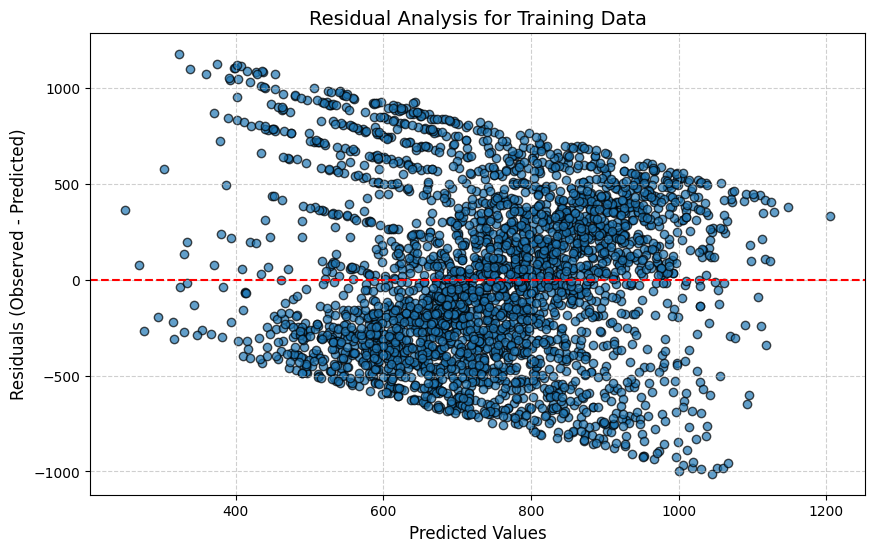

In [46]:
# Calculate residuals
y_train_pred = regressor.predict(X_train)
train_residuals = y_train - y_train_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, train_residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)  # Horizontal line at zero
plt.title('Residual Analysis for Training Data', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Observed - Predicted)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

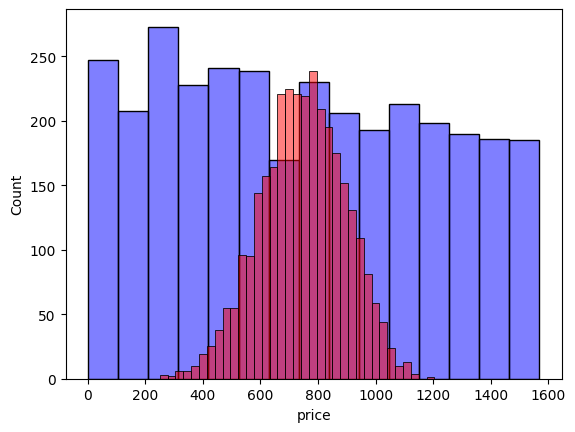

In [47]:
sns.histplot(y_train, color='blue', alpha=0.5)
sns.histplot(y_train_pred, color='red', alpha=0.5)
plt.show()

## Making prediction

In [48]:
X_test = label_car_test
y_test_pred = regressor.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
2580,555,678.995205
3660,1110,372.394272
897,909,732.393201
2091,894,811.269651
1044,1421,922.692396
...,...,...
283,1160,707.998679
712,1402,896.518220
274,1275,743.375378
2279,1090,773.504311


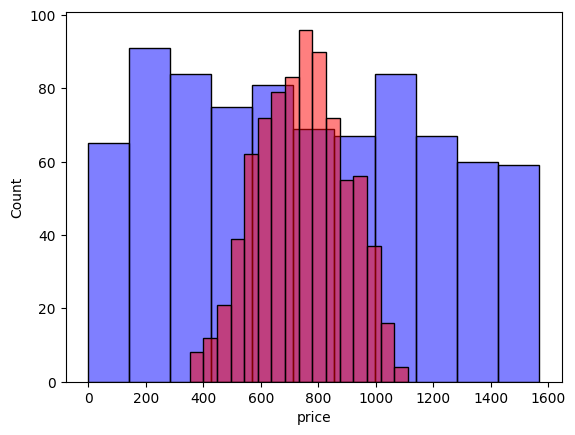

In [49]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
plt.show()

## Evaluation

In [50]:
from sklearn import metrics
print('MAE = ', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE = ', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R_squared = ', metrics.r2_score(y_test, y_test_pred))

MAE =  351.49727748382077
MSE =  183125.48244214442
RMSE =  427.9316329066413
R_squared =  0.05493976057378902


# 3. Automatic Feature Selection (RFE - Recursive Feature Elimination)

What does it mean? And why would I want to use this rather than others?

RFE is a type of automatic feature selection technique used to identify the most important features in a dataset for building predictive models. **It recursively removes the least important features, builds the model on the remaining features, and repeats the process until the desired number of features is reached.**

**How RFE works**

- Fit the model: start by fitting a regression model using all available features in the dataset.
- Rank features by importance: rank all the features based on their importance or contribution to the model. For a linear regression model, this is often done based on the absolute values of the model coefficients.
- Eliminate the least important feature
- Repeat the process
- Select the optimal features

**Why Use RFE Over Sklearn or Statsmodels for Feature Selection?**

- RFE integrates feature selection directly with the model building process, making it a seamless part of your workflow. Instead of first using feature selection methods and then building a model, RFE does both simultaneously.
- With RFE, you can choose any estimator (regression model) compatible with the scikit-learn API such as linear regression, decision tree, or SVMs. This flexibility allows you to tailor feature selection to your specific modeling approach.
- Better than univariate methods (e.g., selecting features based on their inividual statistical significance). RFE takes into account interactions and multicolinearity between features, providing a more holistic approach to feature selection.

In [51]:
#importing the linear regression algorithm
from sklearn.linear_model import LinearRegression
regressor_temp = LinearRegression()

#importing the RFE feature selection
from sklearn.feature_selection import RFE
rfe = RFE(regressor_temp, n_features_to_select=7)
rfe = rfe.fit(X_train, y_train)

In [ ]:
temp_df = pd.DataFrame({'Columns': X_train.columns,
                        'Included': rfe.support_,
                       'Ranking':rfe.ranking_})
temp_df

,Columns,Included,Ranking
0,engine,True,1
1,milage,True,1
2,model,True,1
3,ext_col,False,4
4,int_col,False,3
5,model_year,True,1
6,transmission,True,1
7,brand,False,2
8,fuel_type,True,1
9,accident,True,1


In [52]:
#to select relevant columns
imp_col = X_train.columns[rfe.support_]
imp_col

Index(['engine', 'milage', 'model', 'model_year', 'transmission', 'brand',
       'fuel_type'],
      dtype='object')

In [53]:
X_train_rfe=label_car_train[imp_col]
X_train_rfe.head()

,engine,milage,model,model_year,transmission,brand,fuel_type
2473,0.478603,0.833156,0.340011,0.818182,0.278689,0.250000,0.333333
1338,0.638428,0.946752,0.986294,0.969697,0.032787,0.267857,0.333333
1613,0.772052,0.696841,0.511334,0.757576,0.327869,0.071429,0.333333
1610,0.537991,0.857295,0.467053,0.787879,0.262295,0.482143,0.333333
2600,0.079476,0.511537,0.377965,0.818182,0.622951,0.250000,0.166667


In [54]:
from sklearn.linear_model import LinearRegression
regressor_rfe = LinearRegression()
regressor_rfe.fit(X_train_rfe, y_train)

LinearRegression()

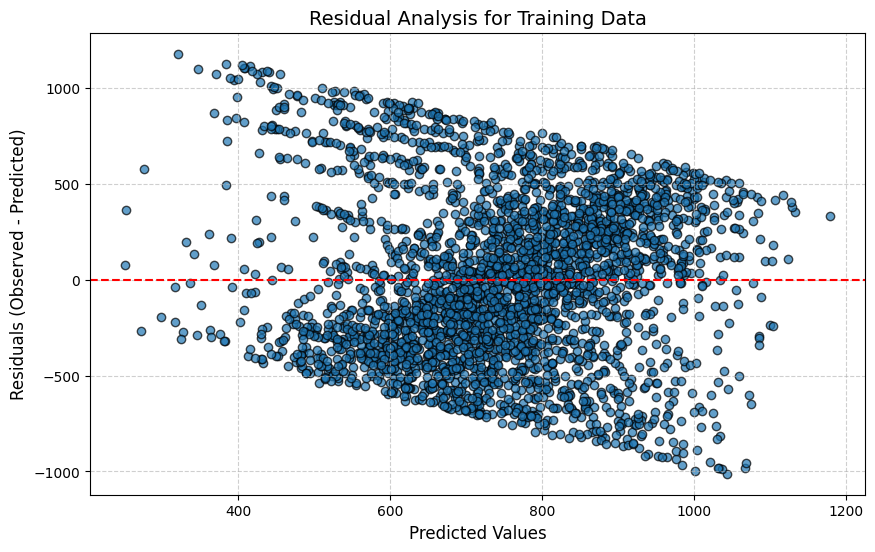

In [55]:
# Calculate residuals
y_train_pred_rfe = regressor_rfe.predict(X_train_rfe)
train_residuals = y_train - y_train_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred_rfe, train_residuals, alpha=0.7, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)  # Horizontal line at zero
plt.title('Residual Analysis for Training Data', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Observed - Predicted)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [56]:
#applying to test data
X_test_rfe = label_car_test[imp_col]
y_test_pred_rfe = regressor_rfe.predict(X_test_rfe)

In [57]:
temp_df_rfe = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_rfe})
temp_df_rfe

,Actual,Predicted
2580,555,678.697060
3660,1110,369.979310
897,909,722.426674
2091,894,797.658916
1044,1421,923.617051
...,...,...
283,1160,722.039808
712,1402,871.200813
274,1275,748.068776
2279,1090,773.225738


In [58]:
from sklearn import metrics
print('MAE = ', metrics.mean_absolute_error(y_test, y_test_pred_rfe))
print('MSE = ', metrics.mean_squared_error(y_test, y_test_pred_rfe))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfe)))
print('R2 = ', metrics.r2_score(y_test, y_test_pred_rfe))

MAE =  351.98614602812086
MSE =  183543.6063098634
RMSE =  428.41989485767743
R2 =  0.052781938312973065


# 4. Feature importance using Ensemble

Feature Importance using Ensemble Methods refers to the process of evaluating the relative importance of each feature (independent variable) in predicting the target variable in a model based on ensemble algorithms like Random Forest, Gradient Boosting, XGBoost, AdaBoost, and others. Ensemble methods combine predictions from multiple models to improve accuracy and robustness, and they inherently provide measures of feature importance.

**Random Forest Ensemble**

Random Forest is a powerful and widely used ensemble learning method for both regression and classification tasks. It operates by building multiple decision trees during training and combining their outputs to improve predictive performance and control overfitting.

**How Random Forest Works**

A. Building the Forest:
   - Random Forest consists of a collection of individual decision trees, often referred to as an ensemble.
   - Each tree is trained on a random subset of the training data (with replacement), a technique known as bootstrapping.
   - At each split in the tree, Random Forest considers a random subset of features instead of all features, which helps to reduce correlation among the trees.

B. Making Predictions:
   - For classification: Each tree "votes" for a class label, and the majority vote determines the final prediction.
   - For regression: The predictions of all the trees are averaged to produce the final output.

C. Key Principles:
   - Bagging: Combines predictions from multiple models trained on different random subsets of the data.
   - Random Feature Selection: Reduces correlation between trees by splitting on randomly chosen features, which improves robustness.

**Strengths of Random Forest**

- Handles High-Dimensional Data: Random Forest works well with datasets containing many features and can identify which features are important.

- Reduces Overfitting: By averaging predictions from multiple trees, it smooths out individual errors and reduces overfitting.

- Robust to Noise and Outliers: Random Forest is resilient to noisy data and can handle missing data to some extent.

- Non-Linearity: Can model complex, non-linear relationships between predictors and the target variable without requiring explicit feature engineering.

- Feature Importance: Provides feature importance scores, making it useful for interpretability and feature selection.

In [59]:
#using the Random forest ensemble
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
predictions = model_rf.predict(X_test)
model_rf.feature_importances_

array([0.24462347, 0.15759068, 0.14145764, 0.05496674, 0.03951532,
       0.20340282, 0.04817431, 0.09098504, 0.01928397])

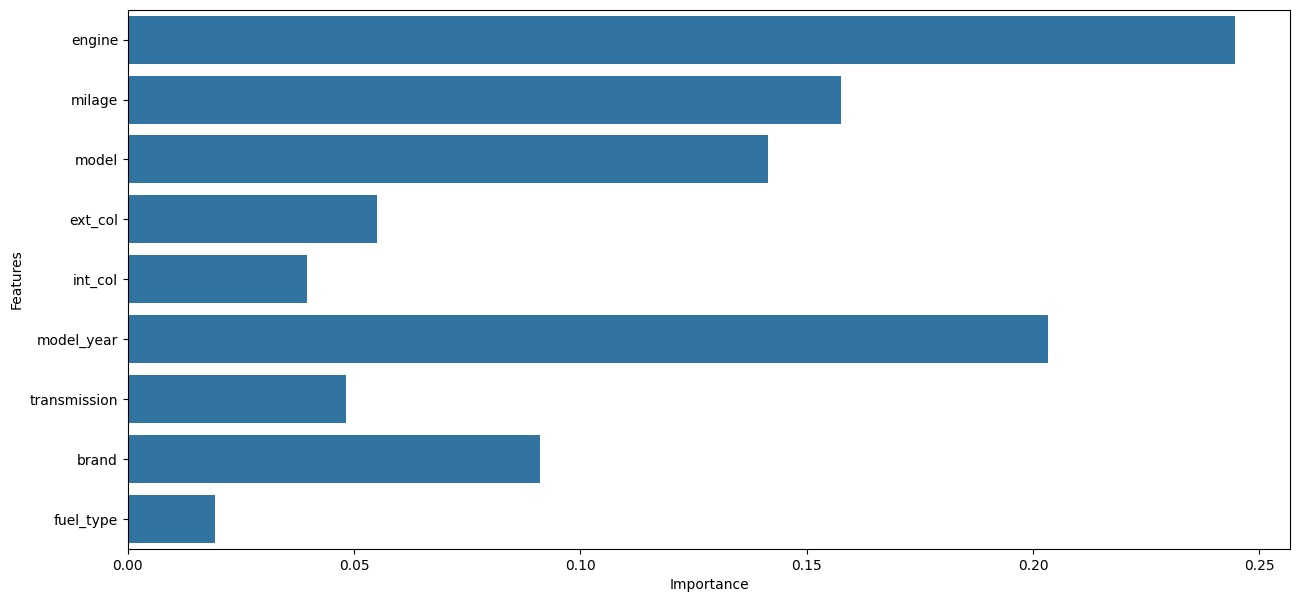

In [61]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_rf.feature_importances_, y = X_train.columns,)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

.**Interpretation and insights**

a. Significant Features:

- Engine (Engine performance and efficiency) and Model year (Manufacturing year of the vehicle for information about depreciation and technology advancement) have the highest importance scores.
- This suggests that these two features are the most influential in predicting the target variable (used car prices).

b. Less Important Features: Features like Fuel type (the type of fuel a vehicle run on), and Int_col (interior color of a vehicle)have very low importance scores. These features contribute minimally to the model's predictions.


c. Engine: This feature has the highest importance score, indicating that engine performance and efficiency is the most critical predictor in this model. This aligns with real-world expectations where the performance and efficiency of a used car strongly influences its price.

d. Model year: The manufacturing year of a vehicle is the second most important predictor, suggesting the high influence of depreciation and technological advancement on the target variable.

e. Other Features: Features like Model and Brand (Identify the vehicle and company name) also have moderate importance scores, indicating some influence on predictions.

f. Model Insight: The Random Forest model uses these importance scores to decide which features to split on when building decision trees. Features with higher importance scores often lead to significant reductions in prediction error.

g. Feature Selection: If you were to simplify the model, you might consider keeping only the most important features (e.g., engine, model year) and removing the less important ones (e.g., fuel type, Interior color) to reduce model complexity without significantly sacrificing accuracy.